<a href="https://colab.research.google.com/github/lanreayk/Data-Analytics_ML_portfolio/blob/main/DA_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#loading google drive to access the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#add file location/path
path = '/content/drive/MyDrive/pet_supplies_2212.csv'

In [ ]:
import pandas as pd
df = pd.read_csv(path)

In [ ]:
print(df)

      product_id   category animal    size  price    sales  rating  \
0              1       Food   Bird   large   51.1  1860.62     7.0   
1              2    Housing   Bird  MEDIUM  35.98   963.60     6.0   
2              3       Food    Dog  medium  31.23   898.30     5.0   
3              4   Medicine    Cat   small  24.95   982.15     6.0   
4              5    Housing    Cat   Small  26.18   832.63     7.0   
...          ...        ...    ...     ...    ...      ...     ...   
1495        1496       Food   Bird  medium  40.91  1203.36     5.0   
1496        1497  Equipment    Dog   small  32.89  1099.97     5.0   
1497        1498       Food   Fish   Small  25.79   724.02     3.0   
1498        1499   Medicine   Fish   small  19.94   658.66     5.0   
1499        1500       Food    Cat  Medium  25.95   826.08     4.0   

      repeat_purchase  
0                   1  
1                   0  
2                   1  
3                   1  
4                   1  
...            

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [ ]:
empty_data =df.isna().sum()
print(empty_data)

product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64


In [ ]:
description=df.describe()
print(description)

        product_id        sales       rating  repeat_purchase
count  1500.000000  1500.000000  1350.000000      1500.000000
mean    750.500000   996.597847     4.991111         0.604000
std     433.157015   323.952676     1.559755         0.489228
min       1.000000   286.940000     1.000000         0.000000
25%     375.750000   747.420000     4.000000         0.000000
50%     750.500000  1000.830000     5.000000         1.000000
75%    1125.250000  1158.157500     6.000000         1.000000
max    1500.000000  2255.960000     9.000000         1.000000


In [ ]:
df['rating'] = df['rating'].fillna(0)

In [ ]:
#check if the missing values have been replaced with '0' in rating
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1500 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [ ]:
df.category.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1500 entries, 0 to 1499
Series name: category
Non-Null Count  Dtype 
--------------  ----- 
1500 non-null   object
dtypes: object(1)
memory usage: 11.8+ KB


In [ ]:
df.category.unique()

array(['Food', 'Housing', 'Medicine', 'Toys', 'Equipment', 'Accessory',
       '-'], dtype=object)

In [ ]:
# "-" is not a number, hence should be replaced with "Unknown" according to the instruction
#dash_count=df.category['-'].sum()
count_dash = df['category'].str.count('-').sum()
count_dash

25

In [ ]:
# Replace the occurrences of "-" with "Unknown"
df['category']=df['category'].replace('-','Unknown')



In [ ]:
df.category.unique()

array(['Food', 'Housing', 'Medicine', 'Toys', 'Equipment', 'Accessory',
       'Unknown'], dtype=object)

In [ ]:
df.animal.unique()

array(['Bird', 'Dog', 'Cat', 'Fish'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1500 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [ ]:
# Calculate the median of the "price" column, excluding the "unlisted" values
median_price = df[df['price'] != 'unlisted']['price'].median()

In [ ]:
median_price

28.064999999999998

In [ ]:
# Round the median value to two decimal places
rounded_median = round(median_price, 2)
rounded_median

28.06

In [ ]:
# Count the number of occurrences of "unlisted" in the "price" column
count_unlisted = (df['price'] == 'unlisted').sum()
count_unlisted

150

In [ ]:
# Replace the occurrences of "unlisted" with the rounded median
df['price'] = df['price'].replace('unlisted', rounded_median)

In [ ]:
# Get the minimum and maximum values in the "price" column
# Convert the "price" column to a numeric data type
df['price'] = pd.to_numeric(df['price'], errors='coerce')
min_price = df['price'].min()
max_price = df['price'].max()

# Print the minimum and maximum values
print("Minimum price:", min_price)
print("Maximum price:", max_price)

Minimum price: 12.85
Maximum price: 54.16


In [ ]:
df['size'] = df['size'].str.capitalize()

In [ ]:
print(df.head(50))

    product_id   category animal    size  price    sales  rating  \
0            1       Food   Bird   Large  51.10  1860.62     7.0   
1            2    Housing   Bird  Medium  35.98   963.60     6.0   
2            3       Food    Dog  Medium  31.23   898.30     5.0   
3            4   Medicine    Cat   Small  24.95   982.15     6.0   
4            5    Housing    Cat   Small  26.18   832.63     7.0   
5            6    Housing    Dog   Small  30.77   874.58     7.0   
6            7    Housing    Dog   Small  31.04   875.07     5.0   
7            8       Toys    Cat  Medium  28.90  1074.31     4.0   
8            9  Equipment   Fish  Medium  17.82   503.67     5.0   
9           10   Medicine    Dog  Medium  24.93   838.88     8.0   
10          11       Food    Dog   Large  40.87  1457.22     7.0   
11          12   Medicine   Bird  Medium  34.96  1204.60     5.0   
12          13       Food    Dog  Medium  31.07   889.73     4.0   
13          14       Food    Dog   Large  40.80 

In [ ]:
df.sales.unique()


array([1860.62,  963.6 ,  898.3 , ..., 1099.97,  724.02,  826.08])

In [ ]:
df.sales.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1500 entries, 0 to 1499
Series name: sales
Non-Null Count  Dtype  
--------------  -----  
1500 non-null   float64
dtypes: float64(1)
memory usage: 11.8 KB


In [ ]:
# Get the minimum and maximum values in the "sales" column
# Convert the "price" column to a numeric data type
#df['price'] = pd.to_numeric(df['price'], errors='coerce')
min_sales = df['sales'].min()
max_sales = df['sales'].max()

# Print the minimum and maximum values
print("Minimum sales:", min_sales)
print("Maximum sales:", max_sales)

Minimum sales: 286.94
Maximum sales: 2255.96


In [ ]:
# Get the minimum and maximum values in the "rating" column
# Convert the "price" column to a numeric data type
#df['price'] = pd.to_numeric(df['price'], errors='coerce')
min_rating = df['rating'].min()
max_rating = df['rating'].max()

# Print the minimum and maximum values
print("Minimum rating:", min_rating)
print("Maximum rating:", max_rating)

Minimum rating: 0.0
Maximum rating: 9.0


In [ ]:
#check for missing values and unique data in repeat_purchase
df.repeat_purchase.unique()

array([1, 0])

In [ ]:
df.repeat_purchase.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1500 entries, 0 to 1499
Series name: repeat_purchase
Non-Null Count  Dtype
--------------  -----
1500 non-null   int64
dtypes: int64(1)
memory usage: 11.8 KB


In [ ]:
## TASK 1


Product_id: There are 1500 unique values that matches the description given. there are no missing values. No changes was made to this column.

Category: There were six(6) unique values that matches the six(6) descriptions given. There are 25 missing values. The mising values were replaced with "Unknown".

Animal: The four(4) unique values in the data matches the description given in the instructions. There are no missing values. No changes was made to this column.

Size: The column has three(3) categories that matches the given description. However, the column is formatted to make sure the 3 items "small',"medium" and "large" all started with capital letter.

Price: The values in this column ranges from 12.85 to 54.16. There were 150 missing values. The missing values were replaced with median(28.06) of the remaining values rounded off to 2 decimal places.

Sales: The values in this column ranges from 286.94 to 2255.96. There are no missing values. No changes was made to this column.

Rating: The values ranges from 0.0 - 9.0. There were 150 missing values. All missing values were replaced with zero '0'.

repeat_purchase: The values are either 0 or 1 as given in the description. there are no missing values. No changes was made to this column.


In [ ]:
df.head(20)

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,51.10,1860.62,7.0,1
1,2,Housing,Bird,Medium,35.98,963.60,6.0,0
2,3,Food,Dog,Medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,Small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1
5,6,Housing,Dog,Small,30.77,874.58,7.0,0
6,7,Housing,Dog,Small,31.04,875.07,5.0,0
7,8,Toys,Cat,Medium,28.90,1074.31,4.0,0
8,9,Equipment,Fish,Medium,17.82,503.67,5.0,0
9,10,Medicine,Dog,Medium,24.93,838.88,8.0,0


In [ ]:
# export the cleaned data to folder datacamp
# Save and export the cleaned data to a CSV file
#df.to_csv('datacamp/cleaned_data.csv', index=False)

In [ ]:
# Set the file path in Google Drive
file_path = '/content/drive/MyDrive/cleaned_DA_data.csv'

# Save and export the cleaned data to a CSV file in Google Drive
df.to_csv(file_path, index=False)

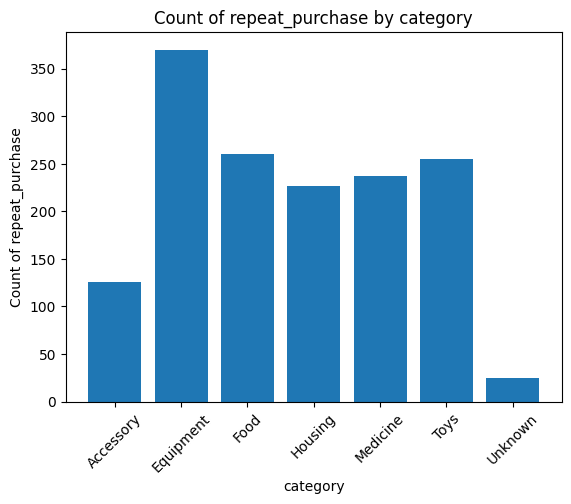

In [ ]:
# Group the DataFrame by "place type" and calculate the count of "rating" values
grouped_data = df.groupby('category')['repeat_purchase'].count()
from matplotlib import pyplot
import matplotlib.pyplot as plt
# Plot the bar chart
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('category')
plt.ylabel('Count of repeat_purchase')
plt.title('Count of repeat_purchase by category')
plt.xticks(rotation=45)
plt.show()

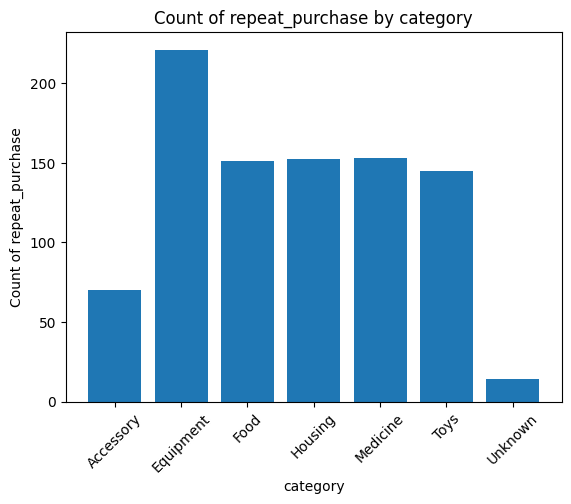

In [ ]:
# Group the DataFrame by "place type" and calculate the count of "rating" values
grouped_data = df.groupby('category')['repeat_purchase'].sum()
from matplotlib import pyplot
import matplotlib.pyplot as plt
# Plot the bar chart
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('category')
plt.ylabel('Count of repeat_purchase')
plt.title('Count of repeat_purchase by category')
plt.xticks(rotation=45)
plt.show()

# State which category of the variable repeat purchases has the most observations and explain whether the observations are balanced across categories of the variable repeat purchases:
A bar chart is ploted to compare the frequency of repeat_purchase and non repeat_purchase across different categories. Equipment has the highest observation for both repeat_purchase (1) and non repeat_purchase (0) while Unknown has the least. In total, repeat_purchase has the most observation (1). The categories are unbalanced as most observations are repeat_purchase (1). Food as an everyday item has a slightly higher observation in repeat_purchase (1) than non repeat_purchase(0).  




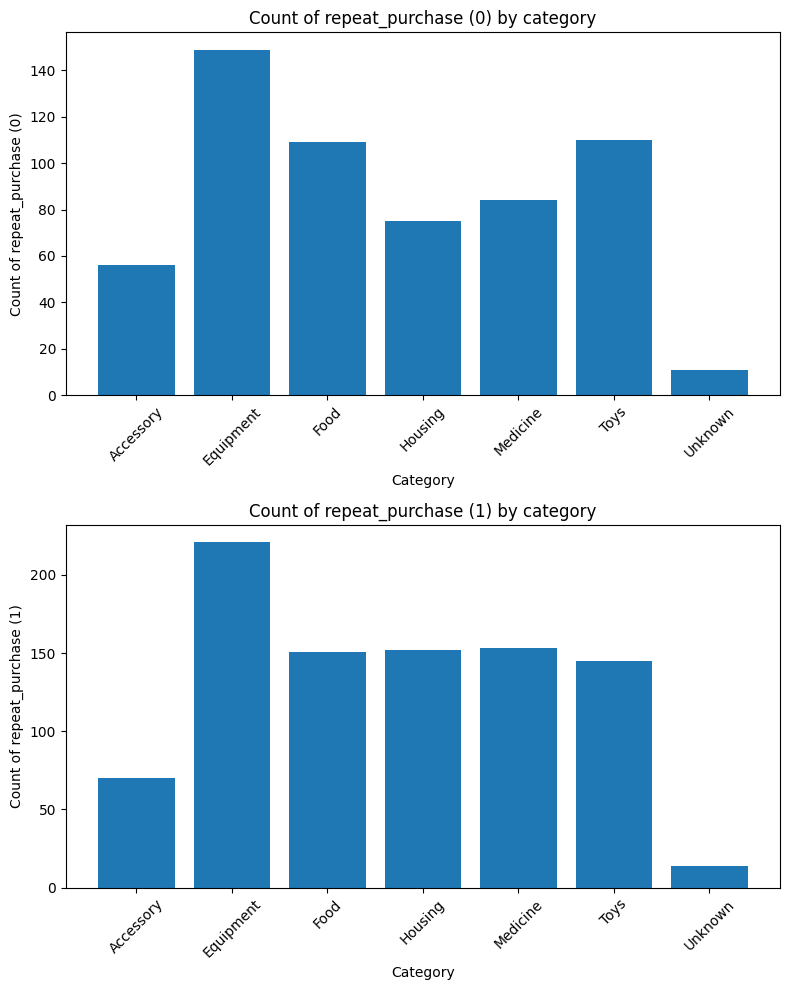

In [ ]:
# Group the DataFrame by "category" and calculate the count of "repeat_purchase" values
grouped_data = df.groupby(['category', 'repeat_purchase']).size().unstack()

# Plot the bar charts
fig, ax = plt.subplots(nrows=2, figsize=(8, 10))

# Bar chart for "repeat_purchase = 0"
ax[0].bar(grouped_data.index, grouped_data[0])
ax[0].set_xlabel('Category')
ax[0].set_ylabel('Count of repeat_purchase (0)')
ax[0].set_title('Count of repeat_purchase (0) by category')
ax[0].tick_params(axis='x', rotation=45)

# Bar chart for "repeat_purchase = 1"
ax[1].bar(grouped_data.index, grouped_data[1])
ax[1].set_xlabel('Category')
ax[1].set_ylabel('Count of repeat_purchase (1)')
ax[1].set_title('Count of repeat_purchase (1) by category')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

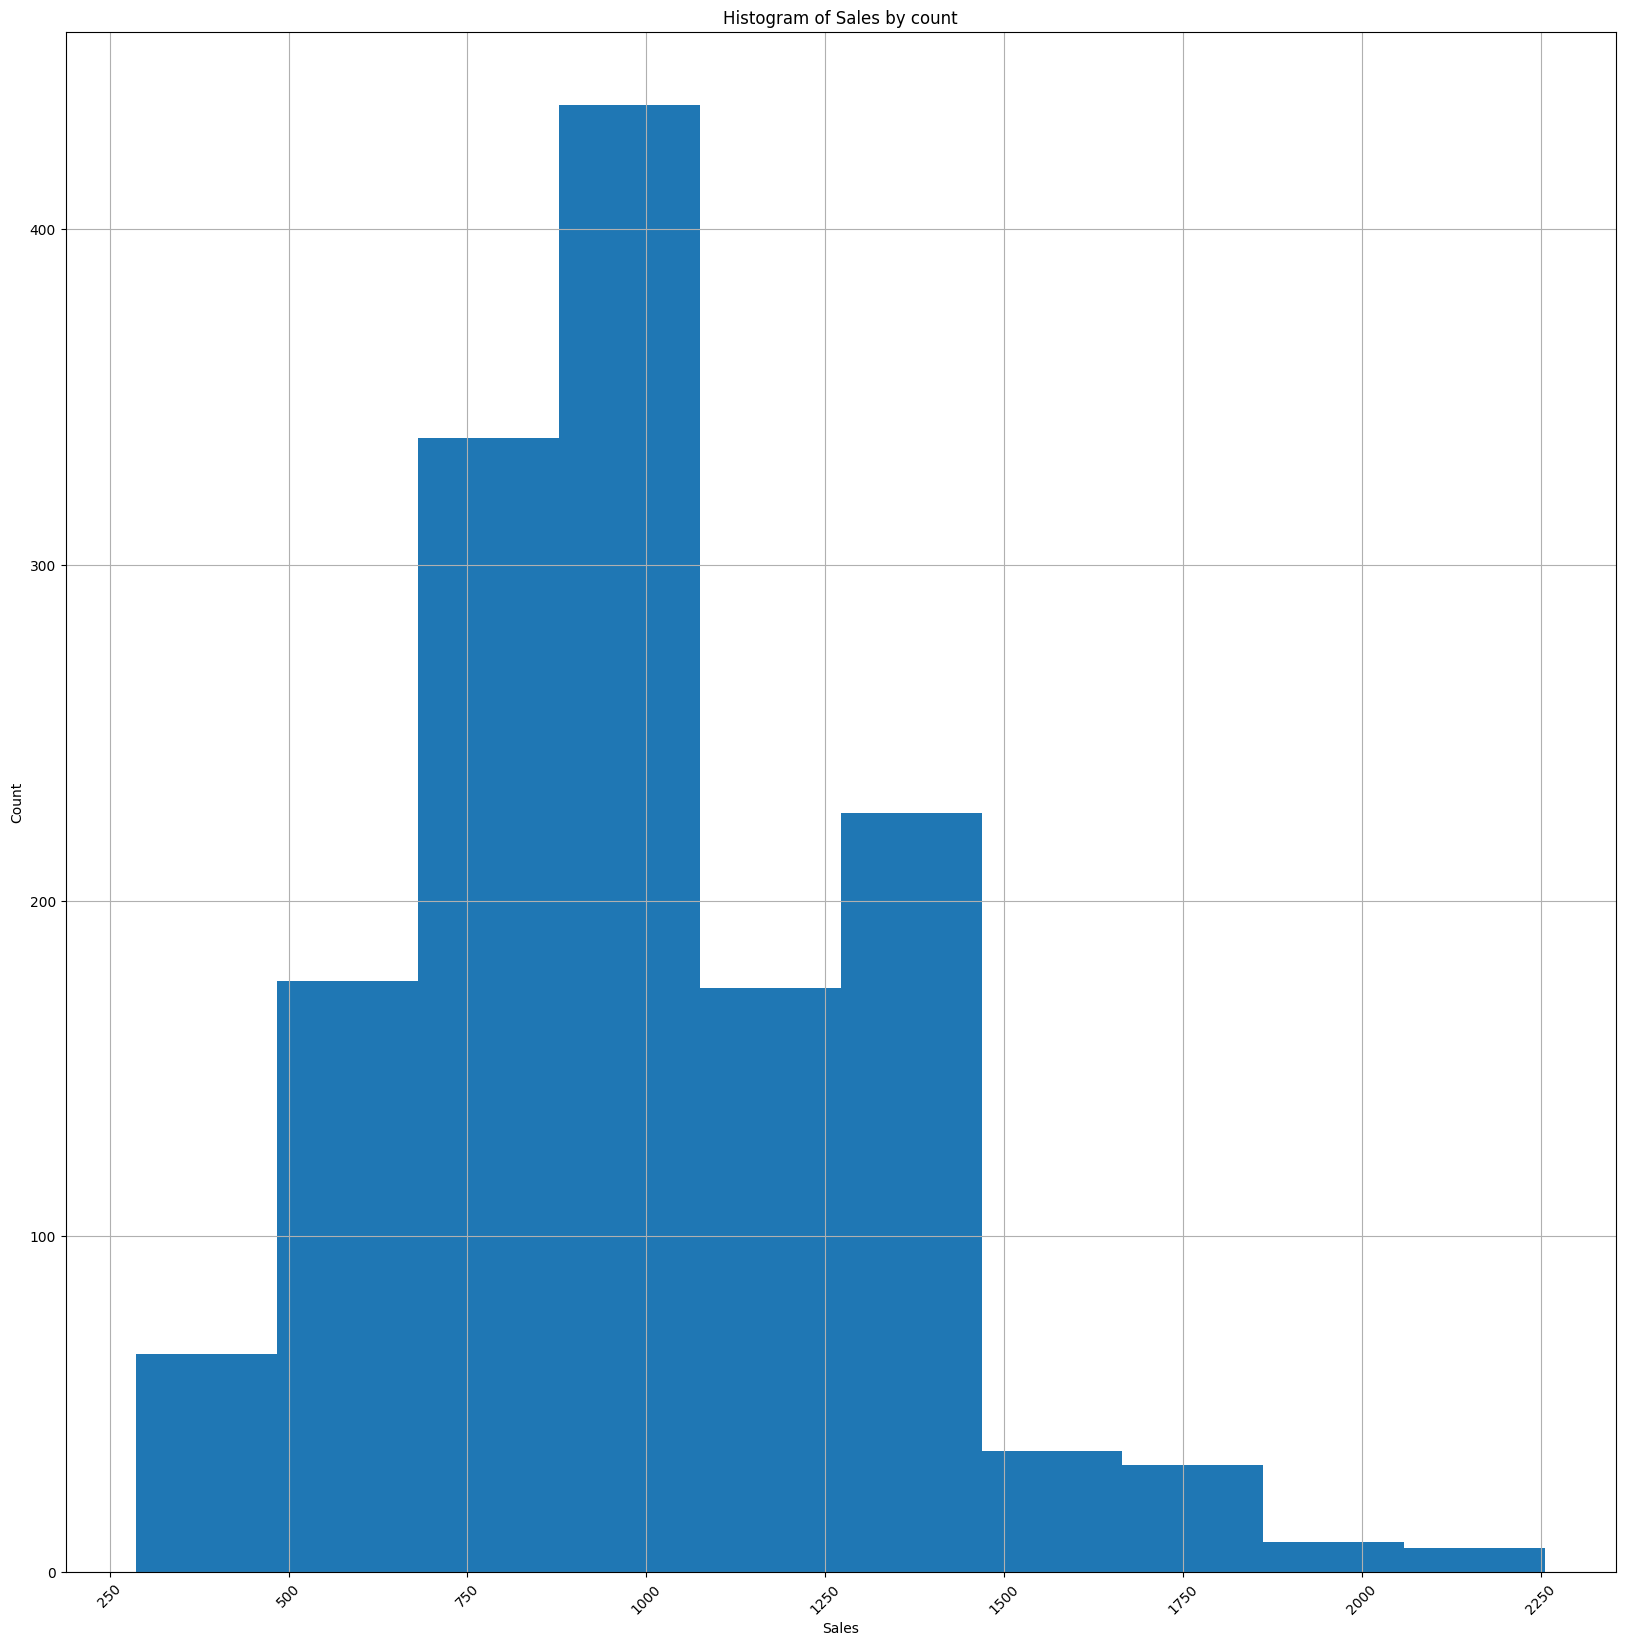

In [ ]:
df.sales.hist()
plt.xlabel('Sales')
plt.ylabel('Count')
plt.title('Histogram of Sales by count')
plt.xticks(rotation=45)
plt.gcf().set_size_inches(20,20)
pyplot.show()

#Describe the distribution of all of the sales. Your answer must include a visualization that shows the distribution.

 Since the aim of the company is to increase sales, understanding the distribution of sales is very important accros luxury and every day item.A plot of the sales distribution shows that most sales are within the 500 - 1500 bracket. there are very few outliers with unsual sales over 1750.The distribution of the number of sales is right skewed.This includes both repeat and non repeat sales.

Text(0.5, 1.0, 'Box Plot of Sales by Repeat_purchase')

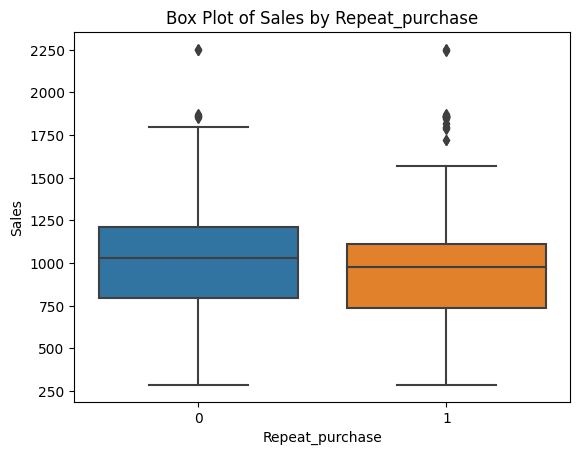

In [ ]:
import seaborn as sns
# Create box plots using seaborn
sns.boxplot(x='repeat_purchase', y='sales', data=df)
# Set the labels and title
plt.xlabel('Repeat_purchase')
plt.ylabel('Sales')
plt.title('Box Plot of Sales by Repeat_purchase')

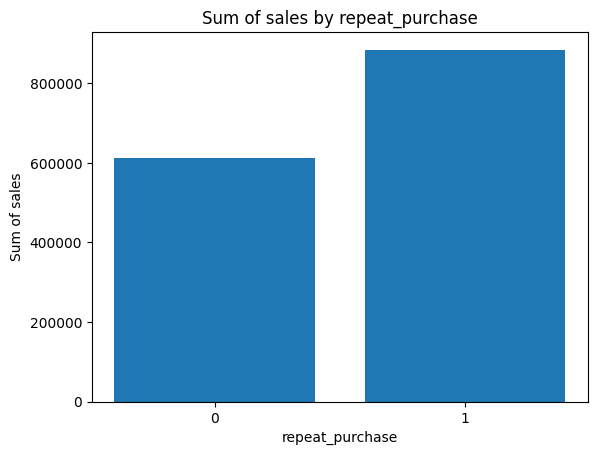

In [ ]:
# Group the DataFrame by "repeat_purchase" and calculate the sum of "sales" values
grouped_data = df.groupby('repeat_purchase')['sales'].sum()

# Plot the bar chart
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('repeat_purchase')
plt.ylabel('Sum of sales')
plt.title('Sum of sales by repeat_purchase')
plt.xticks(grouped_data.index)  # Ensure correct x-axis tick labels
plt.show()

upper_bound: 1774.26375
lower_bound: 131.3137499999999
beyond_upper: 0        True
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Name: sales, Length: 1500, dtype: bool
(array([   0,   19,   39,   73,  150,  164,  173,  178,  212,  227,  249,
        279,  291,  292,  294,  328,  404,  421,  448,  458,  466,  469,
        517,  531,  548,  579,  587,  605,  622,  648,  652,  727,  945,
        969,  982, 1097, 1104, 1155, 1198, 1277, 1416, 1440, 1442]),)
beyond_lower: 0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Name: sales, Length: 1500, dtype: bool
(array([], dtype=int64),)
      product_id   category animal    size  price    sales  rating  \
1              2    Housing   Bird  Medium  35.98   963.60     6.0   
2              3       Food    Dog  Medium  31.23   898.30     5.0   
3    

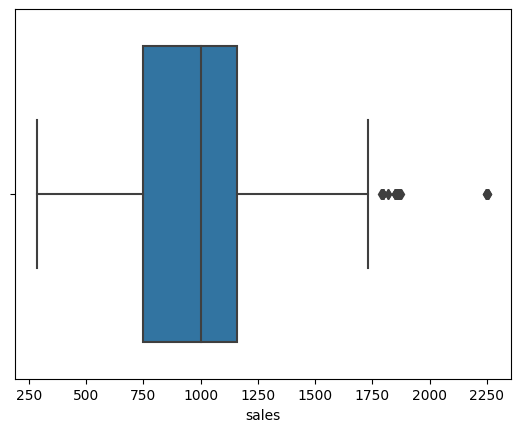

In [ ]:
# Generate a box plot to visualize the distribution
import numpy as np

sns.boxplot(x=df['sales'])

# Calculate the quartiles and IQR
Q1 = df['sales'].quantile(0.25)
Q3 = df['sales'].quantile(0.75)
IQR = Q3 - Q1

# Define the range for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print ("upper_bound:", upper_bound)
print("lower_bound:", lower_bound)
# Identify and remove outliers
upper= df['sales'] >= upper_bound
print("beyond_upper:",upper)
print(np.where(upper))
lower=df['sales'] <= lower_bound
print("beyond_lower:",lower)
print(np.where(lower))
df_cleaned = df[(df['sales'] >= lower_bound) & (df['sales'] <= upper_bound)]

# Display the cleaned DataFrame
print(df_cleaned)


In [ ]:
#drop the outliers
df_filtered=df.drop(df.index[[ 0,   19,   39,   73,  150,  164,  173,  178,  212,  227,  249,
        279,  291,  292,  294,  328,  404,  421,  448,  458,  466,  469,
        517,  531,  548,  579,  587,  605,  622,  648,  652,  727,  945,
        969,  982, 1097, 1104, 1155, 1198, 1277, 1416, 1440, 1442]])

In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 1 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1457 non-null   int64  
 1   category         1457 non-null   object 
 2   animal           1457 non-null   object 
 3   size             1457 non-null   object 
 4   price            1457 non-null   float64
 5   sales            1457 non-null   float64
 6   rating           1457 non-null   float64
 7   repeat_purchase  1457 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 102.4+ KB


Text(0.5, 1.0, 'Box Plot of Sales by Repeat_purchase')

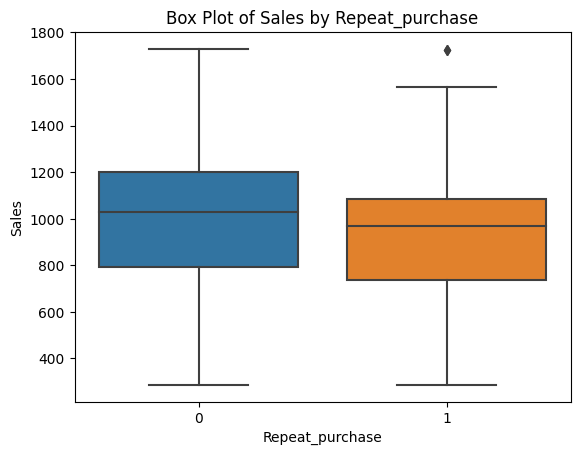

In [ ]:
# box plot after removing outliers
import seaborn as sns
# Create box plots using seaborn
sns.boxplot(x='repeat_purchase', y='sales', data=df_filtered)
# Set the labels and title
plt.xlabel('Repeat_purchase')
plt.ylabel('Sales')
plt.title('Box Plot of Sales by Repeat_purchase')

# Describe the relationship between repeat purchases and sales. Your answer mustinclude a visualization to demonstrate the relationship:

The goal is to increase sales using repeat purchase of everyday item. To know how repeat_purchase categories impacts sales, a bar chart and boxplot is used to examin there interaction. A number of outliers were observed in the boxplot and removed to avoid missinterpretation of the relationship. Before removal of the outliers, a comparison of the total sum of sales between repeat purchase (1) and non repeat purchase(0) indicated a higher repeat purchase sum of sales at over 800,000 and non repeat purchase at about 600,000. The median in repeat purchase is lower than non repeat purchase and has lower variability. After removal of the outliers. the repeat purchase sum of sales reduces slightly to about 800,000 and non repeat purchase is few points below 600,000. The median and variability characteristics remain the same. Since there is significant higher volume of sales by repeat purchase over non repeat purchase, it can be suggested that increase in repeat purchase can increase volume of sales. Drilling down to Food item been the everday item that the company target for increasing sales. The bar chat of total sales from Food showed a higher sales by repeat purchase than non repeat purchase. Hence, increasing the repeat purchase of every day item (Food) can be used to increase company sales.

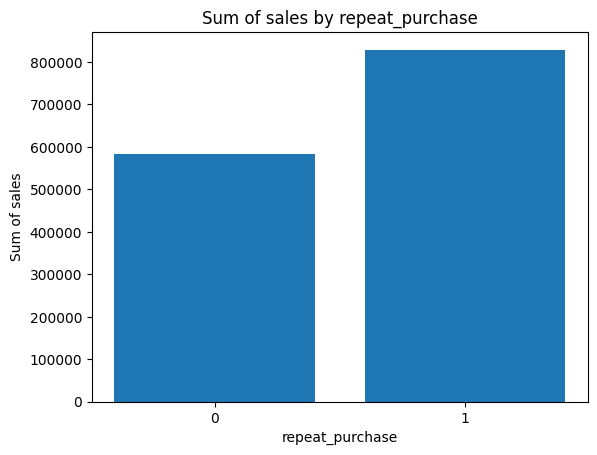

In [ ]:
# comparison bar graph after removal of outliers
# Group the DataFrame by "repeat_purchase" and calculate the sum of "sales" values
grouped_data = df_filtered.groupby('repeat_purchase')['sales'].sum()

# Plot the bar chart
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('repeat_purchase')
plt.ylabel('Sum of sales')
plt.title('Sum of sales by repeat_purchase')
plt.xticks(grouped_data.index)  # Ensure correct x-axis tick labels
plt.show()

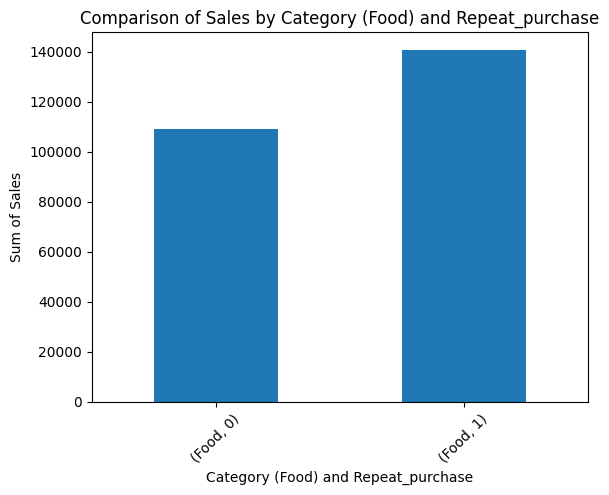

In [ ]:
# Filter the DataFrame to include only 'Food' sub-item in the 'category' column
filtered_df = df_filtered[df_filtered['category'] == 'Food']

# Group the filtered DataFrame by "category" (Food) and "repeat_purchase", and calculate the sum of "sales"
grouped_data = filtered_df.groupby(['category', 'repeat_purchase'])['sales'].sum()

# Plot the bar chart
grouped_data.plot(kind='bar')
plt.xlabel('Category (Food) and Repeat_purchase')
plt.ylabel('Sum of Sales')
plt.title('Comparison of Sales by Category (Food) and Repeat_purchase')
plt.xticks(rotation=45)
plt.show()